# Case study - Cancer Detection

# Objective:
Using historical data about patients who were diagnosed with cancer, enable the doctors to confidently differentiate malignant cases from benign given the independent attributes.
Prepare the data and create the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('bc2.csv')
data.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
data.tail()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [5]:
cols=data.columns
cols

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [6]:
data.shape

(699, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
data.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [9]:
data["Bare Nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [10]:
data["Bare Nuclei"].fillna(value=data["Bare Nuclei"].median)

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: object

In [11]:
for i in cols:
    print(i," :",sum(data[i]=="?"))

ID  : 0
ClumpThickness  : 0
Cell Size  : 0
Cell Shape  : 0
Marginal Adhesion  : 0
Single Epithelial Cell Size  : 0
Bare Nuclei  : 16
Normal Nucleoli  : 0
Bland Chromatin  : 0
Mitoses  : 0
Class  : 0


In [12]:
data["Bare Nuclei"].fillna(value=data["Bare Nuclei"].median,inplace=True)

In [13]:
data=data.replace('?', np.nan)
data=data.apply(lambda x: x.fillna(x.median()),axis=0)

In [14]:
for i in cols:
    print(i," :",sum((data[i]=="?")|(data[i]=="-")))

ID  : 0
ClumpThickness  : 0
Cell Size  : 0
Cell Shape  : 0
Marginal Adhesion  : 0
Single Epithelial Cell Size  : 0
Bare Nuclei  : 0
Normal Nucleoli  : 0
Bland Chromatin  : 0
Mitoses  : 0
Class  : 0


In [15]:
data.describe(include='all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


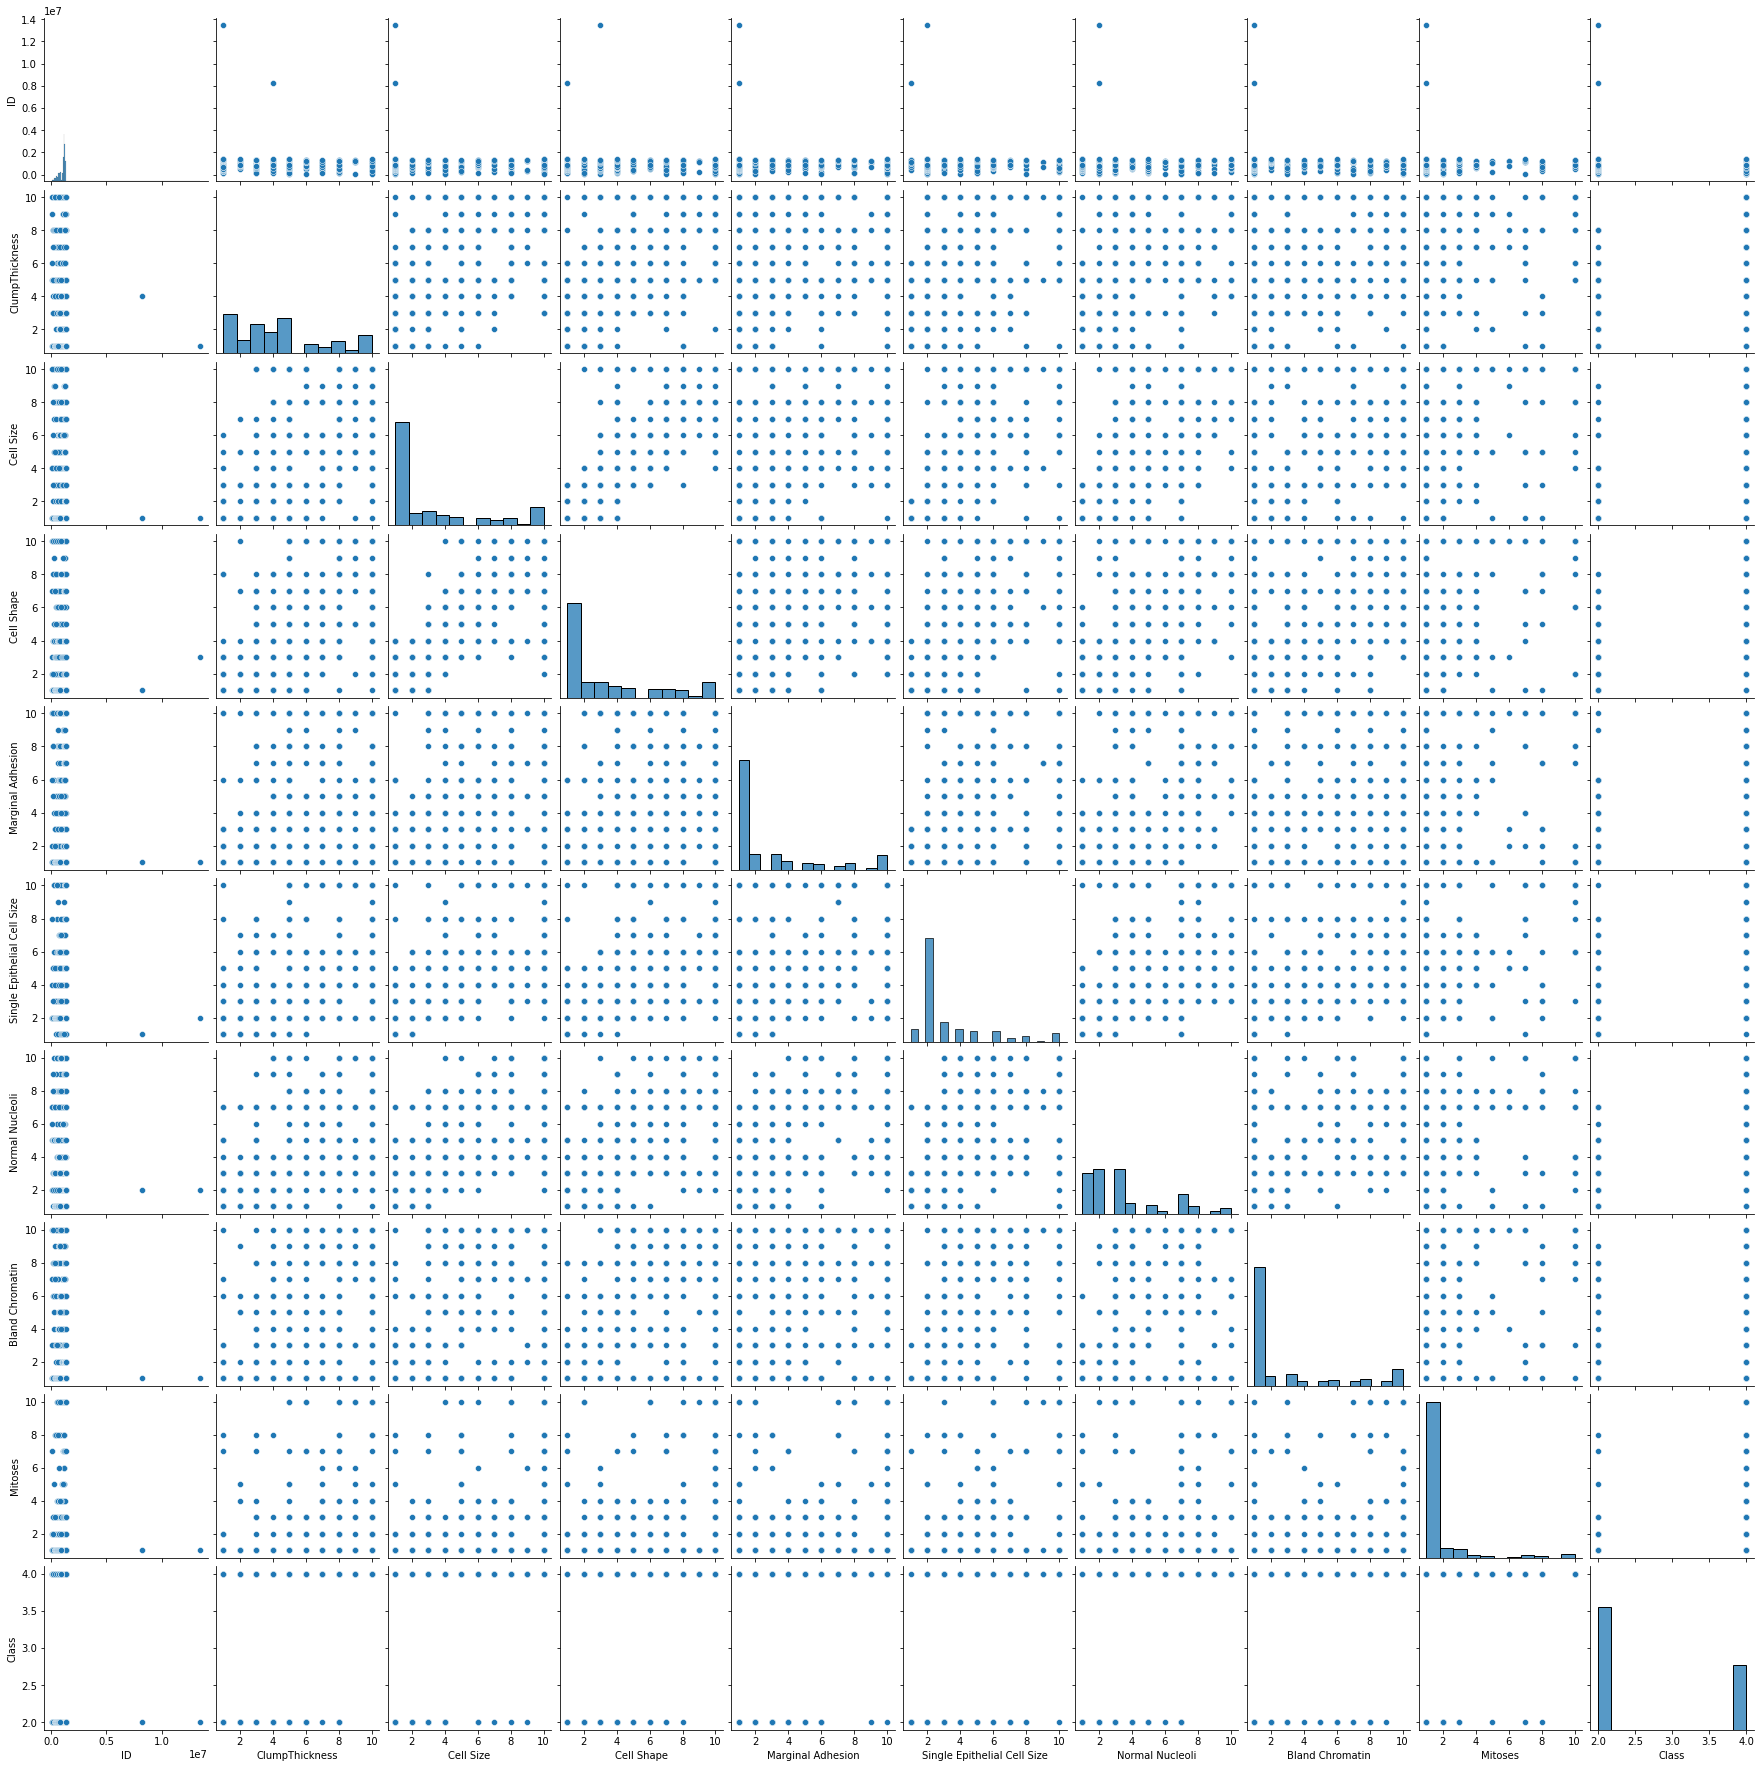

In [17]:
sns.pairplot(data)

In [16]:
y=data[['Class']]
x=data.drop("Class",1)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [18]:
print(x_train.shape)
print(x_test.shape)

(524, 10)
(175, 10)


In [19]:
kernel_types=["linear","poly","rbf","sigmoid"]
c=np.arange(0.1,1.1,0.1)
gamma=[1, 0.1, 0.01, 0.001, 0.0001]

In [20]:
param_grid = {'C': np.arange(0.1,1.1,0.1),  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['rbf','linear','poly','sigmoid']} 

In [23]:
grid=GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=2)

In [ ]:
grid.fit(x_train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [ ]:
c=np.arange(0.1,1.1,0.1)  # Range of C values

kernels=['linear','rbf','sigmoid','poly']  # Range of kernels

# Loop to find the best parameters for C and Kernels

for k in range (len(kernels)):
    for i in range (len(c)):
        SVM_Classifier = SVC(C=c[i],kernel=kernels[k])
        SVM_Classifier.fit(x_train, y_train)
        print ('C=',round(c[i],2),"\tKernel=",kernels[k],'\tScore=',SVM_Classifier.score(x_test, y_test))

C= 0.1 	Kernel= linear 	Score= 0.6685714285714286
C= 0.2 	Kernel= linear 	Score= 0.6628571428571428
C= 0.3 	Kernel= linear 	Score= 0.6628571428571428


In [ ]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)
print(svc_model.score(x_train, y_train))
print(svc_model.score(x_test, y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))


In [23]:
svc=SVC(kernel="linear")
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [24]:
print(svc.score(x_train,y_train))
print(svc.score(x_test,y_test))

0.6526717557251909
0.6628571428571428


In [25]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
print(svc.score(x_train,y_train))
print(svc.score(x_test,y_test))

0.648854961832061
0.6742857142857143


In [26]:
svc=SVC(kernel="poly")
svc.fit(x_train,y_train)
print(svc.score(x_train,y_train))
print(svc.score(x_test,y_test))

0.648854961832061
0.6742857142857143


In [27]:
svc=SVC(kernel="sigmoid")
svc.fit(x_train,y_train)
print(svc.score(x_train,y_train))
print(svc.score(x_test,y_test))

0.648854961832061
0.6742857142857143
